# Individual Project: Stock Indices Data and Machine Learning Analysis

In [ ]:
# Import libraries and loading datasets
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import torch
import random
import torch.nn as nn
from torch.utils.data import DataLoader

# Change file path to your own location
s_p500 = pd.read_csv("/Users/sapds/Documents/Processed_S&P.csv")
nasdaq = pd.read_csv("/Users/sapds/Documents/Processed_NASDAQ.csv")
russell = pd.read_csv("/Users/sapds/Documents/Processed_RUSSELL.csv")
dji = pd.read_csv("/Users/sapds/Documents/Processed_DJI.csv")
nyse = pd.read_csv("/Users/sapds/Documents/Processed_NYSE.csv")

In [ ]:
# Datasets consist of 1984 rows, 84 columns
datasets = [s_p500, nasdaq, russell, dji, nyse]
for i in range(len(datasets)):
  print(datasets[i].shape)

(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)


In [ ]:
# For each dataset, convert the date column to date time dtype, and set date as index.
for i in range(len(datasets)):
  datasets[i]['Date'] = pd.to_datetime(datasets[i]['Date'])
  datasets[i] = datasets[i].set_index("Date")
  display(datasets[i].head(5))
s_p500, nasdaq, russell, dji, nyse = datasets

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,640.099976,0.921723,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,638.489990,-0.375903,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,637.950012,0.996234,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,641.969971,0.059932,0.006301,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10428.049805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,10583.959961,NaN,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,10572.019531,NaN,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,7184.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,7326.740234,0.921723,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,7354.870117,-0.375903,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,7377.700195,0.996234,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [ ]:
# All floating columns except one object which is Name column
s_p500.dtypes.value_counts()

float64    82
object      1
Name: count, dtype: int64

## 1) What are the historical price trends for the stock indices, along with the moving averages?

In [ ]:
print("\nTrading Days per years")
display(s_p500.groupby(s_p500.index.year).size())
print("\nTrading Days per month")
display(s_p500.groupby([s_p500.index.year, s_p500.index.month]).size())


Trading Days per years


Date
2009      1
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    221
dtype: int64


Trading Days per month


Date  Date
2009  12       1
2010  1       19
      2       19
      3       23
      4       21
              ..
2017  7       20
      8       23
      9       20
      10      22
      11      11
Length: 96, dtype: int64

####Around 252 trading days per year and 21 days per month, also based on research online says about the same.

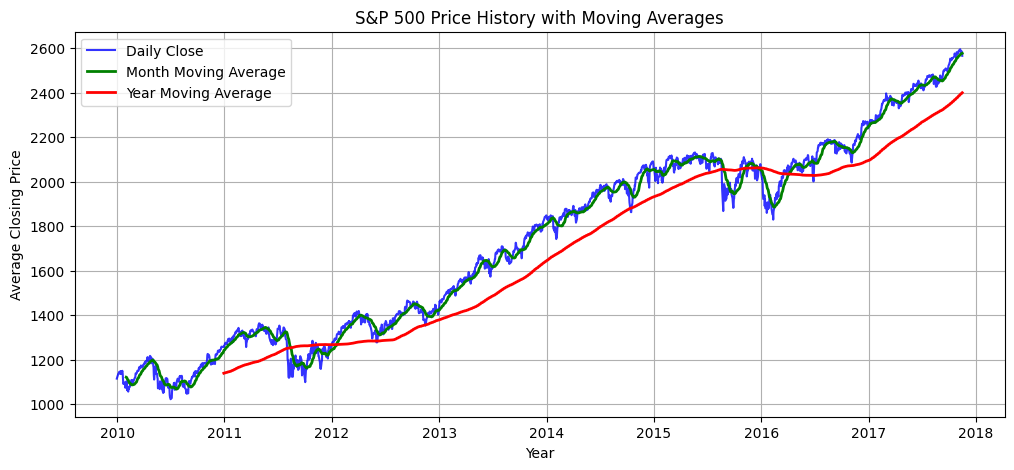

In [ ]:
daily_closing_price = s_p500['Close']
# 21 days is average trading days in month, 252 is average trading days in a year.
month_avg_close = daily_closing_price.rolling(window = 21).mean()
yearly_avg_close = daily_closing_price.rolling(window = 252).mean()

# Plot the daily close price with movement average by month and year.
plt.figure(figsize=(12, 5))
plt.plot(daily_closing_price.index, daily_closing_price, label='Daily Close', linewidth = 1.5, alpha = 0.8, color = 'blue')
plt.plot(month_avg_close.index, month_avg_close, label='Month Moving Average', linewidth = 2, color = "green")
plt.plot(yearly_avg_close.index, yearly_avg_close, label='Year Moving Average', linewidth = 2, color = "red")

plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('S&P 500 Price History with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

* Generally the S&P 500 prices increase from 2010-2018, and we can see slight dips in the years 2011 to 2012, and in 2015-2016, but it's generally in a bull.
* The monthly average close closely follows daily fluctuations in prices, while the yearly moving average is mostly below daily prices, indicating a bullish run for the most part.
* During prices dips such as 2012 and 2016, the price fell below the yearly moving average, which indicated a short bearish period before recovering.

## 2) Do the different stock indices such as S&P 500, NASDAQ, Russell 2000, etc., move together? Are they correlated?

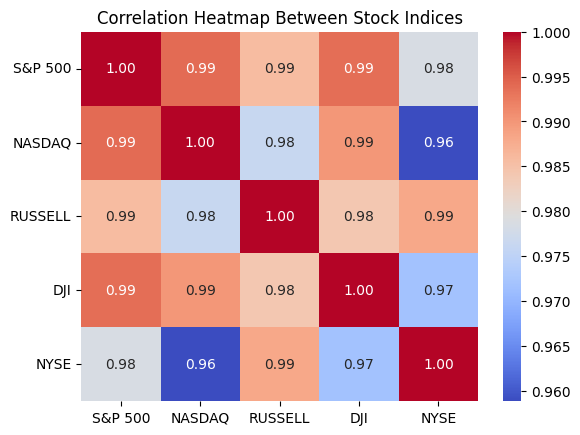

In [ ]:
closing_prices = [df["Close"] for df in datasets]
names = ["S&P 500", "NASDAQ", "RUSSELL", "DJI", "NYSE"]

# Concat dataframe so that each column represents a different index's closing price
all_stocks = pd.concat(closing_prices, axis = 1)
# Rename columns names from 'Close' to the respective stock index name
all_stocks.columns = names
# Calculate correlation between each index
corr_matrix = all_stocks.corr()

# Use a heatmap so it's easier to differentiate higher and lower correlation values
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap Between Stock Indices")
plt.show()

* We can see that all of these stock indices are correlated with each other as their closing prices correlations range from 0.96 to 0.99, showing an extremely strong positive relationship.
* This means it's reasonable to say that when any of these stock indices go up, the other will follow as well.

## 3) Which features are most important towards predicting prices (such as volume, price  changes, average price past 10 days, or other features in the dataset)?

In [ ]:
# X consists of every feature besides name (object) and close (y)
X = s_p500.drop(["Name","Close"], axis = 1)
Y = s_p500["Close"]

# Predict 2017 based on past data from 2010-2016
X_train , Y_train = X[X.index.year < 2017], Y[Y.index.year < 2017]
X_test , Y_test = X[X.index.year == 2017], Y[Y.index.year == 2017]

# Prevent overfitting by using hyperparameters, n_estimators limits number of trees to 100, and 5 max depth of tree.
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth = 5, random_state=0)
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)
# Compute MSE, which is the difference in actual values vs predicted squared and summed up.
mse = mean_squared_error(Y_test, y_pred)

print(f"MSE = {np.sqrt(mse):.2f}\n")
feature_importance = pd.DataFrame(xgb_model.feature_importances_, index=X.columns)
feature_importance.rename(columns = {0: "Feature Importance"}, inplace = True)
top_features = feature_importance.sort_values(by = "Feature Importance", ascending = False)
print("Top 5 Features\n")
round(top_features.head(5), 3)

MSE = 192.98

Top 5 Features



,Feature Importance
EMA_200,0.510
EMA_10,0.456
EMA_20,0.023
EMA_50,0.005
DTB4WK,0.001


* MSE of 192.98, indicates a RMSE of 13.89, meaning the model's price prediction is off by around 13.89 index point on average.
* The top 4 of 5 features are EMA technical indicators, which is the exponential moving average, indicating that exponential moving averages are significant towards predicting S&P 500 price.

##4) Can we use past historic stock prices and other features to predict if the stock market will go up or down tomorrow?

In [ ]:
display(s_p500.select_dtypes(include=['object']).head(5))
# Since name is not needed for training as it doesn't help predict tommorow price, drop it.
s_p500.drop("Name", axis = 1, inplace = True)

,Name
Date,
2009-12-31,S&P
2010-01-04,S&P
2010-01-05,S&P
2010-01-06,S&P
2010-01-07,S&P


In [ ]:
# First create target variable that is, if price went up tommorow, then target on today is 1, otherwise 0.
s_p500['Target'] = (s_p500['Close'].shift(-1) > s_p500['Close']).astype(int)
# Remove last value since we predict tommorow's data, last day in data not needed.
s_p500 = s_p500.iloc[:-1]
features = s_p500.drop("Target", axis = 1)
features = features.fillna(0)
# Scale features for faster and stable training
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(
    scaled_features,
    index = features.index,
    columns = features.columns
)

# Creating sliding windows of 60 days, so each training window cover last 60 days, and classifies tommorow as up or down.
def sliding_window(features_df, window_size = 60):
  """
  Divides time series data into overlapping windows for model training.

  Args:
        features_df (DataFrame): DataFrame of stock features ordered by date
        window_size (int): Number of consectutive days for each input window

  Returns:
        tuple: (X, y) where X is an array of windows, and y is an array of targets
  """
  x, y = [], []
  for i in range(len(features_df) - window_size):
    window = features_df.iloc[i:i+window_size].values
    label = s_p500["Target"].iloc[i+window_size]
    x.append(window)
    y.append(label)
  return np.array(x), np.array(y)

x, y = sliding_window(scaled_df)

In [ ]:
# Train, validation, and test splits

# Since data is from 2010 to 2018, that's around 8 years, so 6/8 for training, 1/8 validation, and 1/8 test
train_size = int(6/8 * len(x))
validation_size = int(1/8 * len(x))

X_train = x[:train_size]
y_train = y[:train_size]

X_validation = x[train_size:train_size + validation_size]
y_validation = y[train_size:train_size + validation_size]

X_test = x[train_size + validation_size:]
y_test = y[train_size + validation_size:]

In [ ]:
# Function converts each X and Y batch for train, validation, and test into tensors, as CNN model requires this for training
class StockDataset(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype = torch.float32)
    self.y = torch.tensor(y, dtype = torch.float32).unsqueeze(1)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
# Data Loaders to create batches on data, model see 32 samples at once, and shuffle for training randomizes batch order during training.
torch.manual_seed(0)
train_loader = DataLoader(StockDataset(X_train, y_train), batch_size = 32, shuffle=True)
validation_loader = DataLoader(StockDataset(X_validation, y_validation), batch_size = 32, shuffle=False) # False to keep consistent order
test_loader = DataLoader(StockDataset(X_test, y_test), batch_size = 32, shuffle=False)

In [ ]:
class StockCNN(nn.Module):
  """
  1D Convolutional Neural Network for stock market prediction.

  Model takes in sliding windows of stock features and uses its
  convolutional layers to learn patterns, in the end creating
  binary prediction, that is 0 or 1.

  Args:
        num_features: Number of input features

  Returns:
        tuple: (X, y) where X is an array of windows, and y is an array of targets
  """
  def __init__(self, num_features):
    super().__init__()
    self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=32, kernel_size=3)
    self.bn1 = nn.BatchNorm1d(32)
    self.conv2 = nn.Conv1d(32, 64, kernel_size=3)
    self.bn2 = nn.BatchNorm1d(64)
    self.pool = nn.AdaptiveAvgPool1d(1)
    self.fc1 = nn.Linear(64, 32)
    self.dropout = nn.Dropout(0.1)
    self.fc2 = nn.Linear(32, 1)

  def forward(self, x):
    """
    Defines forward pass in model.

    Args:
          x (tensor): Input tensor of batch, shape is (batch, window_size, features)

    Returns:
          x (tensor): Output logits in the shape of (batch, 1)
    """
    x = x.transpose(1, 2)
    x = torch.relu(self.bn1(self.conv1(x)))
    x = torch.relu(self.bn2(self.conv2(x)))
    x = self.pool(x).squeeze(-1)
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

In [ ]:
torch.cuda.is_available()

True

In [ ]:
results = []

# For loop runs on 10 different torch seeds, for each run
# model has different random initialization on weights, thus
# the mean accuracy and macro f1 score is calculated to assess
# the model performance.

# Model utilizes adam optimizer, with BCEWithLogitsLoss criterion, with
# a learning rate of 1e-4 (0.0001).
for i in range(10):
  torch.manual_seed(i)

  num_columns = X_train.shape[-1]
  model = StockCNN(num_columns)
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

  for epoch in range(50):
    model.train()
    for X_batch, y_batch in train_loader:
      optimizer.zero_grad()
      predicted = model(X_batch)
      loss = criterion(predicted, y_batch)
      loss.backward()
      optimizer.step()

  model.eval()
  all_preds = []
  all_labels = []
  with torch.no_grad():
    for X_batch, y_batch in test_loader:
      # Model outputs logits, which can be any real number, therefore use sigmoid
      # function to transform them into a probability between 0 and 1.
      logits = model(X_batch)
      probs = torch.sigmoid(logits)
      preds = (probs > 0.5).float()
      all_preds.append(preds)
      all_labels.append(y_batch)

  # Concatenate all predictions and labels into one numpy array.
  all_preds = torch.cat(all_preds).numpy()
  all_labels = torch.cat(all_labels).numpy()

  accuracy = accuracy_score(all_labels, all_preds)
  macro_f1 = f1_score(all_labels, all_preds, average='macro')

  results.append({"Training Loss": loss.item(), "Accuracy": accuracy, "Macro F1": macro_f1})
  print(f"Seed {i}: Acc={accuracy:.3f}, F1={macro_f1:.3f}")

Seed 0: Acc=0.419, F1=0.295
Seed 1: Acc=0.593, F1=0.415
Seed 2: Acc=0.523, F1=0.522
Seed 3: Acc=0.510, F1=0.477
Seed 4: Acc=0.419, F1=0.295
Seed 5: Acc=0.581, F1=0.367
Seed 6: Acc=0.598, F1=0.439
Seed 7: Acc=0.519, F1=0.513
Seed 8: Acc=0.473, F1=0.415
Seed 9: Acc=0.539, F1=0.520


In [ ]:
df = pd.DataFrame(results, index=[f"Run {i+1}" for i in range(10)])
df.loc["Average"] = df.mean()
display(round(df, 3))

,Training Loss,Accuracy,Macro F1
Run 1,0.681,0.419,0.295
Run 2,0.605,0.593,0.415
Run 3,0.586,0.523,0.522
Run 4,0.591,0.510,0.477
Run 5,0.915,0.419,0.295
Run 6,0.631,0.581,0.367
Run 7,0.788,0.598,0.439
Run 8,0.692,0.519,0.513
Run 9,0.779,0.473,0.415
Run 10,0.590,0.539,0.520


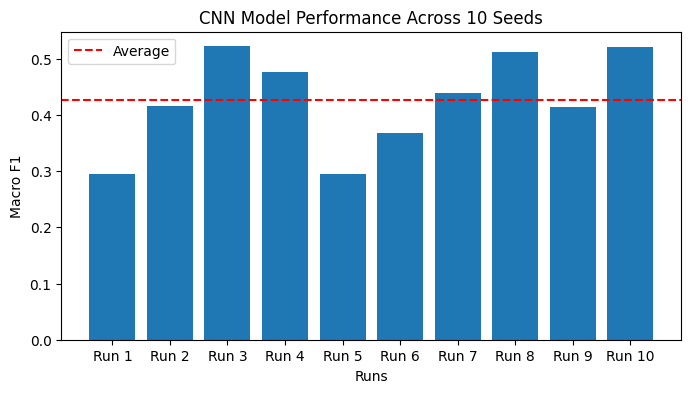

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(df.index[:-1], df['Macro F1'][:-1])
plt.axhline(y=df['Macro F1'].iloc[-1], color='red', linestyle='--', label='Average')
plt.xlabel('Runs')
plt.ylabel('Macro F1')
plt.title('CNN Model Performance Across 10 Seeds')
plt.legend()
plt.show()